A1

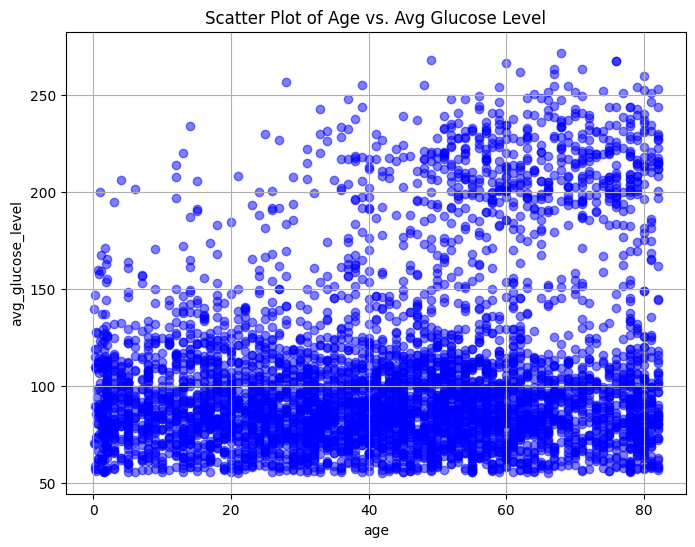

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

df = pd.DataFrame(data)


plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['avg_glucose_level'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs. Avg Glucose Level')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.grid(True)

plt.show()


A2

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

df = pd.DataFrame(data)

X = df[['age']]
y = df['avg_glucose_level']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse:.2f}')


Coefficients: [0.47695593]
Intercept: 85.5304869471585
Mean Squared Error: 1933.90


A3

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

slope = model.coef_
intercept = model.intercept_

y_pred = model.predict(X)

r_squared = model.score(X, y)


A4

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

data['stroke'] = data['stroke'].map({1: 1, 0: 0})

imputer = SimpleImputer(strategy='mean')
data[['bmi']] = imputer.fit_transform(data[['bmi']])

X = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


A5

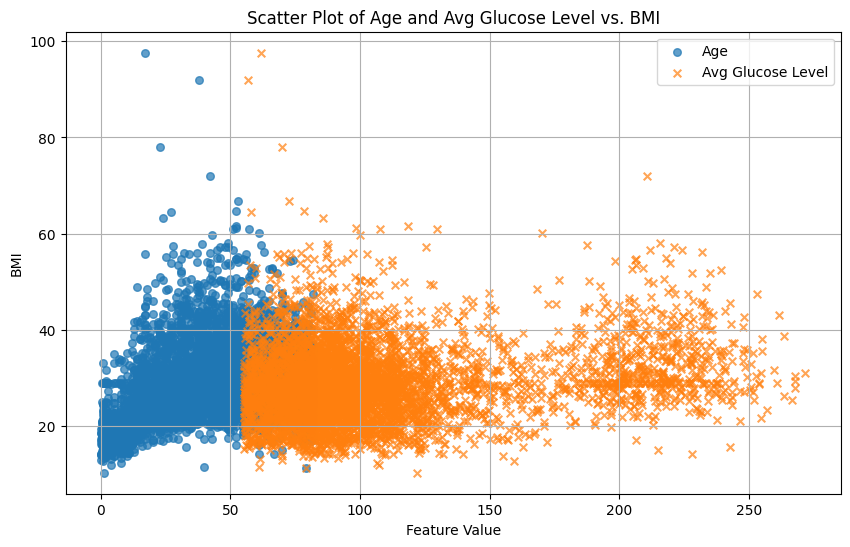

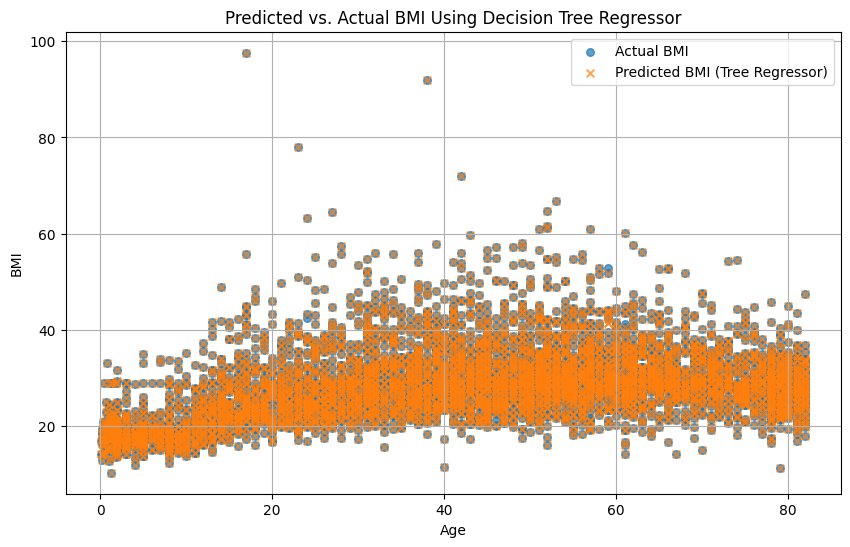

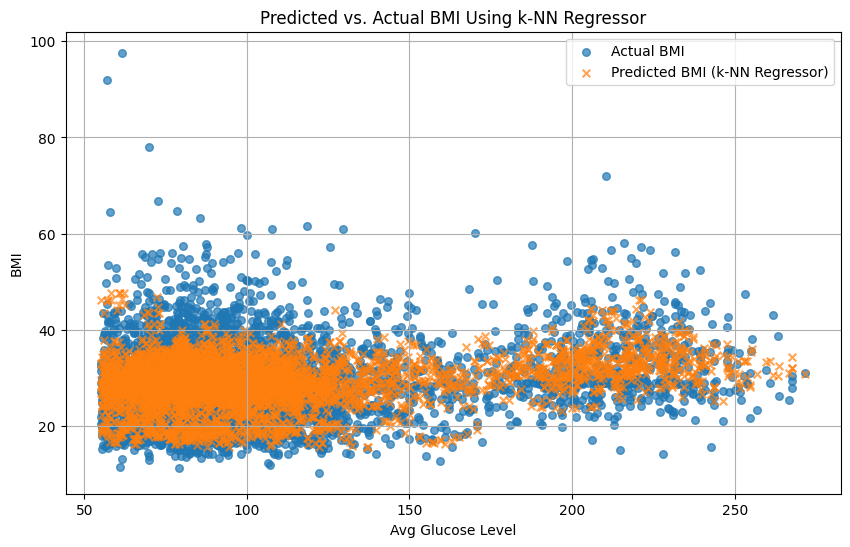

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer

data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

X = data[['age', 'avg_glucose_level']]
y = data['bmi']

imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(X['age'], y, label='Age', marker='o', s=30, alpha=0.7)
plt.scatter(X['avg_glucose_level'], y, label='Avg Glucose Level', marker='x', s=30, alpha=0.7)
plt.xlabel('Feature Value')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age and Avg Glucose Level vs. BMI')
plt.legend()
plt.grid(True)

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X, y)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

age_pred = tree_regressor.predict(X)
avg_glucose_level_pred = knn_regressor.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['age'], y, label='Actual BMI', marker='o', s=30, alpha=0.7)
plt.scatter(X['age'], age_pred, label='Predicted BMI (Tree Regressor)', marker='x', s=30, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Predicted vs. Actual BMI Using Decision Tree Regressor')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.scatter(X['avg_glucose_level'], y, label='Actual BMI', marker='o', s=30, alpha=0.7)
plt.scatter(X['avg_glucose_level'], avg_glucose_level_pred, label='Predicted BMI (k-NN Regressor)', marker='x', s=30, alpha=0.7)
plt.xlabel('Avg Glucose Level')
plt.ylabel('BMI')
plt.title('Predicted vs. Actual BMI Using k-NN Regressor')
plt.legend()
plt.grid(True)

plt.show()
